# _Billionaires Analysis with Python_

<img src='dataset-cover (1).jpg'>

_Bu proje, dünya genelindeki milyarderleri analiz ederek ülkelerin iş ortamı, girişim başarı oranı ve diğer ekonomik özellikleri hakkında bilgiler edinmeyi amaçlamaktadır. Python kullanarak milyarderler arasındaki ilişkileri keşfedecek ve veriyi görselleştireceğiz._

- _**Names**: Milyarderin adı ve soyadı_
- _**Net Worth**: Milyarderin servet değeri (milyar dolar cinsinden)_
- _**Country**: Milyarderin yaşadığı veya vatandaşı olduğu ülke_
- _**Source**: Servetinin kaynağı (ör. teknoloji, moda, finans)_
- _**Rank**: Forbes sıralamasındaki milyarder sırası_
- _**Age**: Milyarderin yaşı_
- _**Industry**: Milyarderin faaliyet gösterdiği sektör_

## _Import_

_Import, Python’da dış kütüphane veya modülleri programa dahil etmek için kullanılan komuttur. Böylece hazır fonksiyon ve araçları kullanabiliriz._

In [1]:
import pandas as pd
# Pandas kütüphanesini pd kısaltmasıyla içe aktarır

In [2]:
import numpy as np 
# lineer ceir, matrix, vektör uzayları

import matplotlib.pyplot as plt 
# grafik olusturma

import seaborn as sns 
# fancy charts - havali grafikler olusturma

In [3]:
import warnings

# Tüm uyarıları gizle
warnings.filterwarnings('ignore')

## _Read Data_

_Read Data, bir dosyadaki verileri (CSV, Excel vb.) Python ortamına aktararak analiz edilebilir hale getirme işlemidir._

In [4]:
df = pd.read_csv('../data/Billionaire.csv')
# CSV dosyasını okuyarak bir DataFrame oluşturur

## _Exploratory Data Analysis_

_EDA (Exploratory Data Analysis), veriyi analiz etmeye başlamadan önce yapısını anlamak için yapılan keşifsel analiz sürecidir. Eksik veriler, dağılımlar ve temel istatistikler bu aşamada incelenir._

In [5]:
df.head()  
# DataFrame’in ilk 5 satırını gösterir

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


In [6]:
df.tail()  
# DataFrame’in son 5 satırını gösterir

,Name,NetWorth,Country,Source,Rank,Age,Industry
2750,Daniel Yong Zhang,$1 B,China,e-commerce,2674,49.0,Technology
2751,Zhang Yuqiang,$1 B,China,Fiberglass,2674,65.0,Manufacturing
2752,Zhao Meiguang,$1 B,China,gold mining,2674,58.0,Metals & Mining
2753,Zhong Naixiong,$1 B,China,conglomerate,2674,58.0,Diversified
2754,Zhou Wei family,$1 B,China,Software,2674,54.0,Technology


In [7]:
df.sample()  
# DataFrame’den rastgele bir satır gösterir

,Name,NetWorth,Country,Source,Rank,Age,Industry
1633,Mahendra Prasad,$2 B,India,pharmaceuticals,1580,81.0,Healthcare


In [8]:
df.shape  
# DataFrame’in satır ve sütun sayısını (boyutunu) verir

(2755, 7)

In [9]:
df.describe()  
# Sayısal sütunlar için temel istatistikleri özetler

,Rank,Age
count,2755.000000,2676.000000
mean,1345.663521,63.113602
std,772.669811,13.445153
min,1.000000,18.000000
25%,680.000000,54.000000
50%,1362.000000,63.000000
75%,2035.000000,73.000000
max,2674.000000,99.000000


In [10]:
ist = df.describe()              # DataFrame için temel istatistikleri hesaplar
ist.to_excel('istatistik.xlsx')  # İstatistikleri Excel dosyası olarak kaydeder

In [11]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar

,Rank,Age
Rank,1.000000,-0.104628
Age,-0.104628,1.000000


In [12]:
df.info()  
# DataFrame’in sütun bilgilerini, veri tiplerini ve dolu/boş değer sayılarını gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


## _Missing Data Handling_

In [13]:
df.isnull().sum()  
# Her sütundaki eksik (NaN) değerlerin sayısını gösterir

Name         0
NetWorth     0
Country      0
Source       0
Rank         0
Age         79
Industry     0
dtype: int64

In [14]:
# eksikleri silmek
df.dropna(subset=['Age'], inplace=True)

In [15]:
# Örnek: '$' ve ',' işaretlerini kaldırıp float'a çevirme
df['NetWorth'] = df['NetWorth'].replace({'\$|,':''}, regex=True) \
                               .replace({'B':'e9','M':'e6'}, regex=True) \
                               .str.replace(' ', '') \
                               .astype(float)

In [16]:
df.isnull().sum()  # kontrol

Name        0
NetWorth    0
Country     0
Source      0
Rank        0
Age         0
Industry    0
dtype: int64

## _Data Visualization_

_Veri Görselleştirmesi, verileri grafikler ve görsellerle sunarak daha kolay anlaşılmasını ve yorumlanmasını sağlayan analiz yöntemidir._

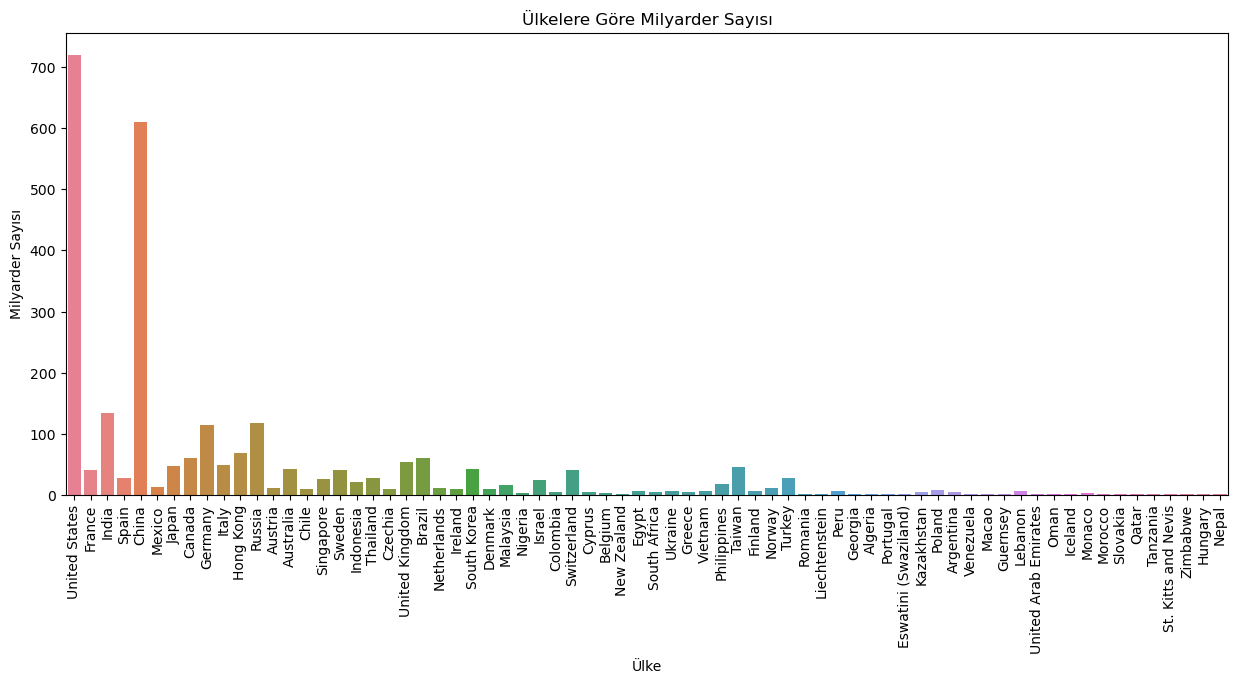

In [22]:
# Ülkelere göre milyarder sayısı
plt.figure(figsize=(15,6))  # Daha geniş bir grafik
sns.countplot(x=df['Country'], hue=df['Country'])
plt.title("Ülkelere Göre Milyarder Sayısı")
plt.xlabel("Ülke")
plt.ylabel("Milyarder Sayısı")
plt.xticks(rotation=90) # Ülke isimleri karışmasın diye dik yaz
plt.show()

**_Açıklama:_**
- _x=df['Country']: X ekseninde ülkeler yer alır_
- _hue=df['Country']: Her ülke için farklı renk atanır_
- _countplot: Her ülkede kaç milyarder olduğunu sayıp görselleştirir_

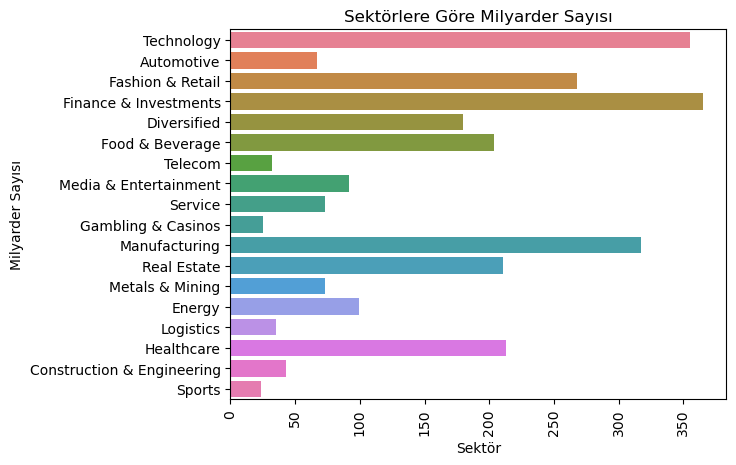

In [28]:
sns.countplot(y=df['Industry'], hue=df['Industry'])
plt.title("Sektörlere Göre Milyarder Sayısı")
plt.xlabel("Sektör")
plt.ylabel("Milyarder Sayısı")
plt.xticks(rotation=90)
plt.show()

**_Açıklama:_**
- _y=df['Industry']: y ekseninde sektörler yer alır_
- _hue=df['Industry']: Her sektör için farklı renk atanır_
- _countplot: Her sektörde kaç milyarder olduğunu sayıp görselleştirir_

In [27]:
# Ülkelere göre milyarder yüzdeleri
df['Country'].value_counts(normalize=True)

Country
United States          0.269058
China                  0.227952
India                  0.050075
Russia                 0.044096
Germany                0.042975
                         ...   
Guernsey               0.000374
Tanzania               0.000374
St. Kitts and Nevis    0.000374
Zimbabwe               0.000374
Nepal                  0.000374
Name: proportion, Length: 70, dtype: float64

**_Açıklama:_**
- _value_counts(normalize=True) ile her ülkenin milyarder sayısının toplam içindeki yüzdesi hesaplanır_
- _Hangi ülkeden kaç milyarder olduğu yüzdelik olarak görülür_

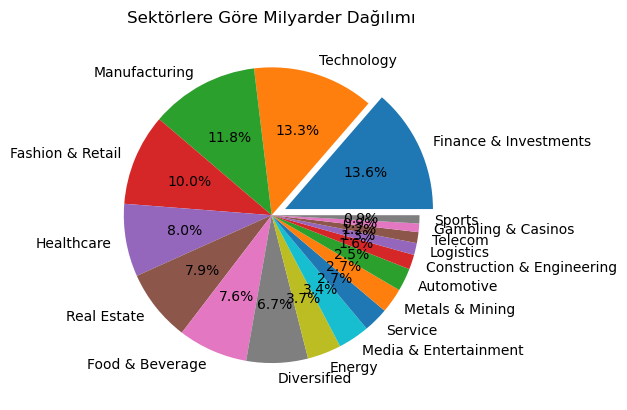

In [33]:
# Sektörlere göre milyarder dağılımı pasta grafiği
df['Industry'].value_counts().plot.pie(
    autopct='%1.1f%%',           # Grafikte yüzde değerleri gösterir
    explode=[0.1 if i==0 else 0 for i in range(len(df['Industry'].value_counts()))],  
)
plt.title("Sektörlere Göre Milyarder Dağılımı")
plt.ylabel("")  # Y eksen başlığını kaldır
plt.show()

**_Açıklama:_**
- _value_counts(): Her sektörün kaç milyarder içerdiğini sayar_
- _autopct='%1.1f%%': Yüzdelik değerleri grafikte gösterir_
- _explode: En büyük dilimi diğerlerinden uzaklaştırır ve vurgular_

In [38]:
# Yaş gruplarını oluştur
bins = [0, 30, 50, 70, 100]
labels = ['0-30','31-50','51-70','71-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

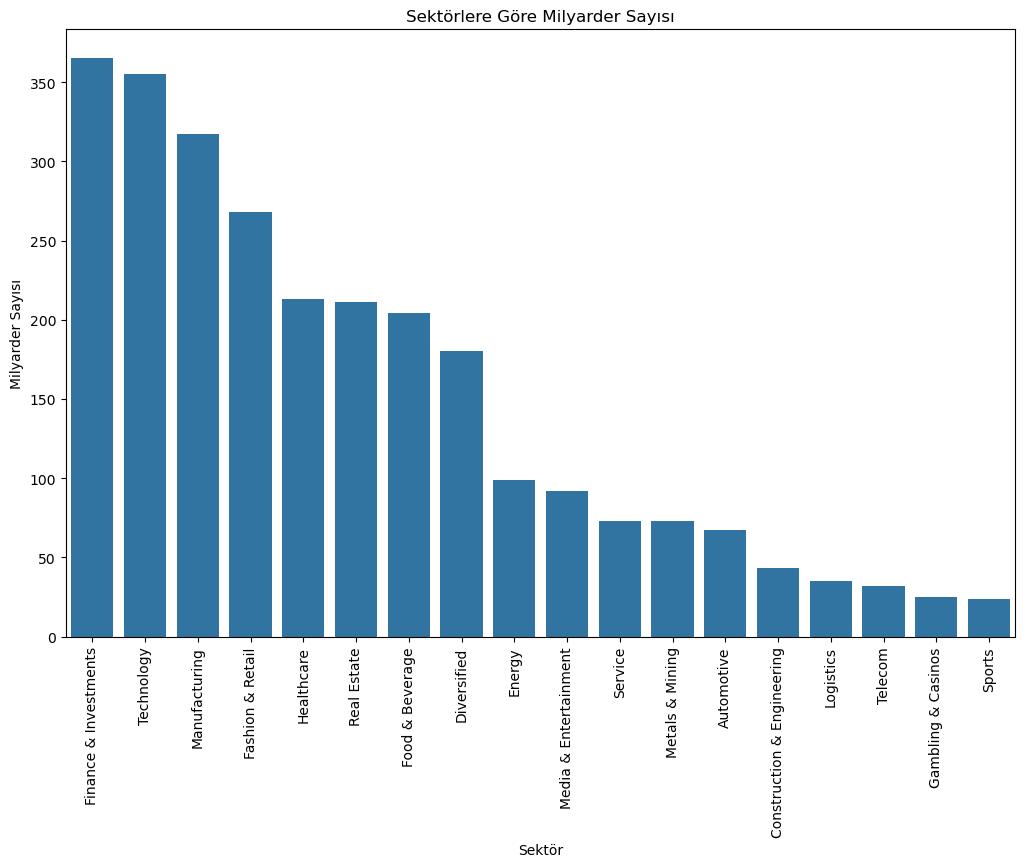

In [40]:
plt.figure(figsize=(20,15))

# Sektörlere göre milyarder sayısı
plt.subplot(2,2,2)
sns.countplot(x='Industry', data=df, order=df['Industry'].value_counts().index)
plt.title("Sektörlere Göre Milyarder Sayısı")
plt.xlabel("Sektör")
plt.ylabel("Milyarder Sayısı")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

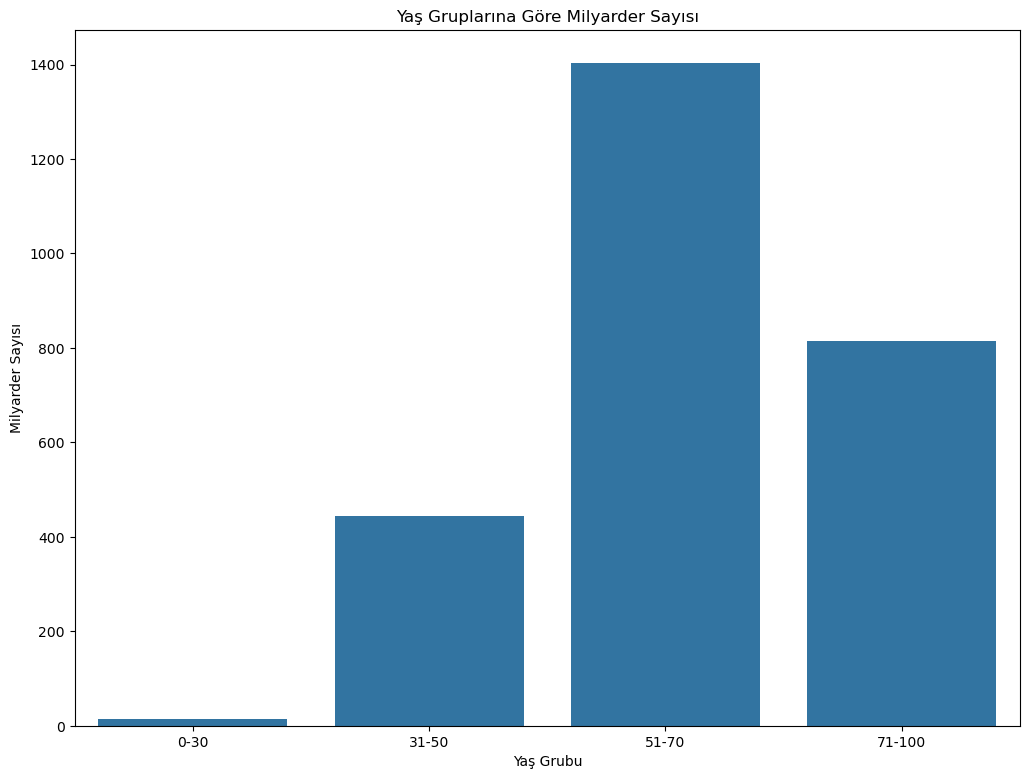

In [41]:
# Yaş gruplarına göre milyarder sayısı
plt.figure(figsize=(20,15))

plt.subplot(2,2,4)
sns.countplot(x='AgeGroup', data=df, order=labels)
plt.title("Yaş Gruplarına Göre Milyarder Sayısı")
plt.xlabel("Yaş Grubu")
plt.ylabel("Milyarder Sayısı")
plt.tight_layout()
plt.show()

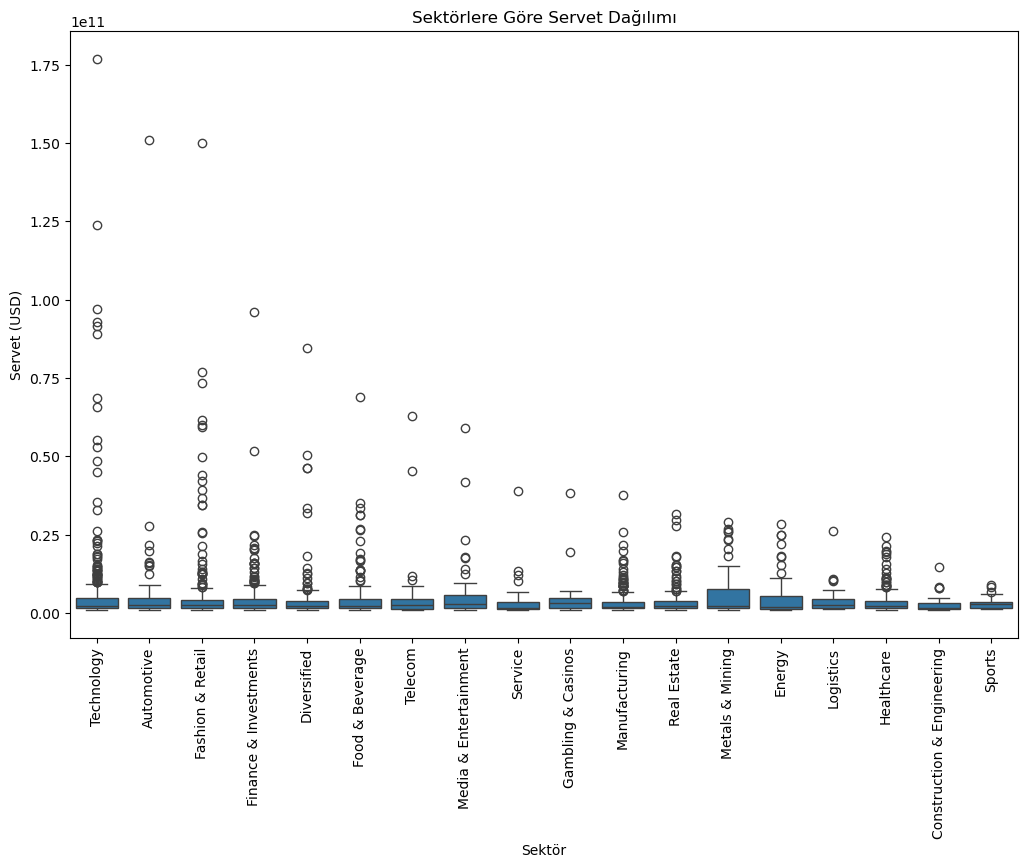

In [45]:
plt.figure(figsize=(20,15))

# Sektöre göre servet dağılımı
plt.subplot(2,2,2)
sns.boxplot(x='Industry', y='NetWorth', data=df)
plt.title("Sektörlere Göre Servet Dağılımı")
plt.xlabel("Sektör")
plt.ylabel("Servet (USD)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [46]:
# Sayısal sütunları seç
numeric_cols = ['NetWorth', 'Age', 'Rank']

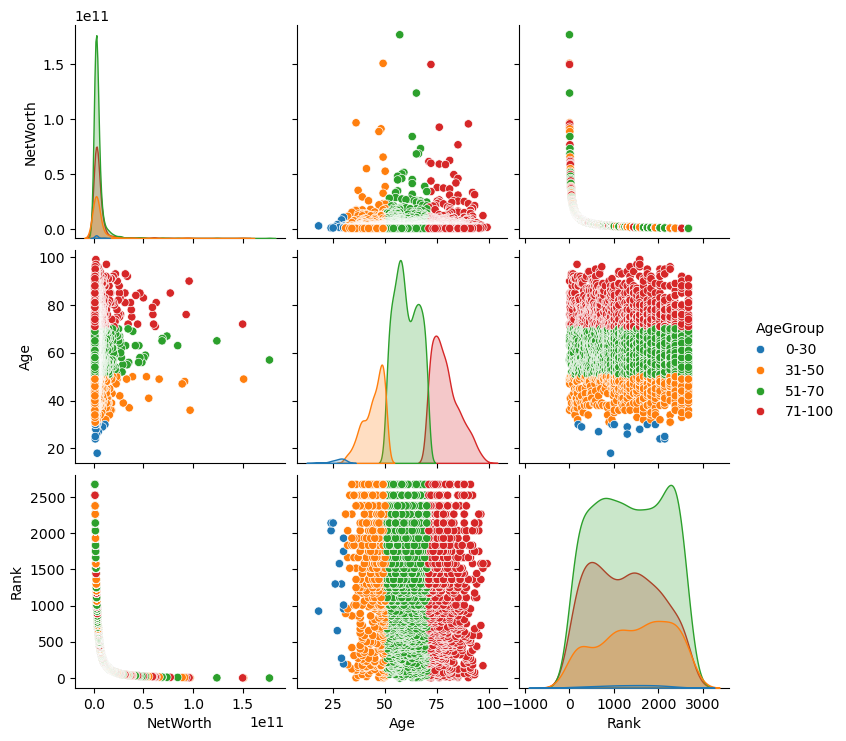

In [50]:
# AgeGroup'u hue olarak kullanıyoruz
sns.pairplot(df[numeric_cols + ['AgeGroup']], hue='AgeGroup', diag_kind='kde')
# Grafiği kaydet
plt.savefig('billionaires_pairplot.png', dpi=300)
plt.show()

**_Açıklama:_**
- _numeric_cols: Sayısal sütunlar arasındaki ilişkiyi gösterir_
- _hue='AgeGroup': Her yaş grubu farklı renk ile gösterilir_
- _diag_kind='kde': Diyagonal grafikte yoğunluk (distribution) çizimi yapılır_
- _plt.savefig(..., dpi=300): Grafiği yüksek çözünürlükte kaydeder_

## _Data Visualization Summary_

_Milyarder veri seti üzerinde yapılan görselleştirmelerden elde edilen temel bulgular:_

- _**Ülkelere göre dağılım:** ABD, Çin ve Hindistan en fazla milyardere sahip._  
- _**Sektörlere göre dağılım:** Teknoloji ve moda/retail sektörleri en çok milyarderi barındırıyor._  
- _**Servet kaynakları:** Servetlerin çoğu teknoloji ve yatırım kaynaklı._  
- _**Yaş grupları:** 50-70 yaş arası milyarder sayısı en yüksek._  
- _**Servet dağılımı (Boxplot):** Bazı ülkelerde aşırı zengin (outlier) milyarderler mevcut, özellikle ABD ve Çin._  
- _**Sayısal ilişkiler (Pairplot):** NetWorth, Rank ve Age arasında belirgin ilişkiler gözlemleniyor; daha genç milyarderlerin genellikle serveti daha düşük, üst sıralarda yoğunlaşan çok zenginler yaşça daha büyük._
